In [20]:
import pyWitness
from matplotlib.pyplot import *
import numpy

# Tutorial

## Checking and exploring loaded data

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.checkData()

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.columnValues("responseTime")

In [11]:
import pyWitness
dr = pyWitness.DataRaw("test1.xlsx","test1")

DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890


## Processing raw experimental data

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dp = dr.process()

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dp = dr.process()
dp.printPivot()
dp.printRates()

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dp = dr.process()
dp.printDescriptiveStats()

## Plotting ROC curves

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dp = dr.process()
dp.plotROC()

## Plotting CAC curves

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dp = dr.process()
dp.plotCAC()

## Collapsing the categorical data

DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890


(0.5, 1.0)

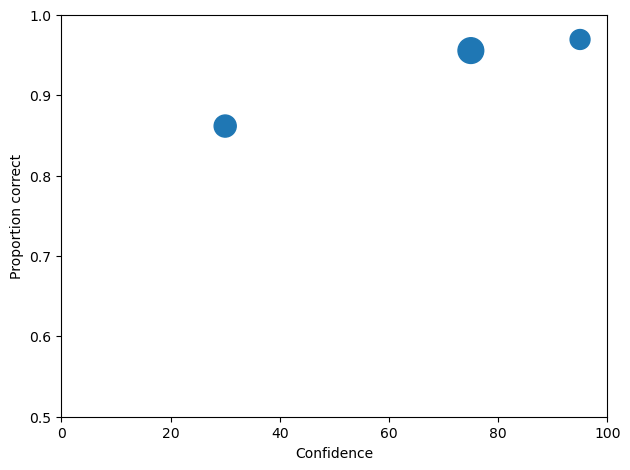

In [19]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseCategoricalData(column='confidence',
                           map={0: 30, 10: 30, 20: 30, 30: 30, 40: 30, 50: 30, 60: 30,
                                70: 75, 80: 75,
                                90: 95, 100: 95})
dp = dr.process()
dp.plotCAC()

#######
xlim(0,100)
ylim(0.50,1.0)

## Collapsing (binning) continuous data

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels= [1,2,3])
dp = dr.process()
dp.plotROC()

## Calculating pAUC and performing statistical tests

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels= [1,2,3])
dp = dr.process()
print(dp.pAUC)

## Plotting RAC curves

In [ ]:
import pyWitness
drRAC = pyWitness.DataRaw("test1.csv")
drRAC.collapseContinuousData(column="responseTime",
                    bins=[0, 5000, 10000, 15000, 20000, 99999],
                        labels=[1, 2, 3, 4, 5])
dpRAC = drRAC.process(reverseConfidence=True,dependentVariable="responseTime")
dpRAC.plotCAC()
import matplotlib as _plt
xlabel("Response time")
ylim(.50,1.0)
#savefig("test1RAC.png")
#savefig("test1RAC.pdf")

## Fitting signal detection-based models to data

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels= [1,2,3])
dp = dr.process()
mf = pyWitness.ModelFitIndependentObservation(dp)
mf.setEqualVariance()
mf.fit()

In [14]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels= [1,2,3])
dp = dr.process()
mf = pyWitness.ModelFitIndependentObservation(dp)
mf.printParameters()

DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890
ModelFit.printParameters>  lureMean 0.000 (free)
ModelFit.printParameters>  lureSigma 1.000 (free)
ModelFit.printParameters>  targetMean 1.000 (free)
ModelFit.printParameters>  targetSigma 1.000 (free)
ModelFit.printParameters>  lureBetweenSigma 0.000 (free)
ModelFit.printParameters>  targetBetweenSigma 0.000 (free)
ModelFit.printParameters>  c1 1.000 (free)
ModelFit.printParameters>  c2 1.500 (free)
ModelFit.printParameters>  c3 2.000 (free)


In [ ]:
mf.setEqualVariance()
mf.printParameters()

In [ ]:
mf.fit()
mf.printParameters()

fit iterations 506
fit status     Optimization terminated successfully.
fit time       26.014116374999503
fit chi2       8.78967472876508
fit ndf        0
fit chi2/ndf   inf
fit p-value    nan
ModelFit.printParameters>  lureMean 0.001 (free)
ModelFit.printParameters>  lureSigma 0.773 (free)
ModelFit.printParameters>  targetMean 1.518 (free)
ModelFit.printParameters>  targetSigma 0.577 (free)
ModelFit.printParameters>  lureBetweenSigma 0.001 (free)
ModelFit.printParameters>  targetBetweenSigma 0.000 (free)
ModelFit.printParameters>  c1 1.279 (free)
ModelFit.printParameters>  c2 1.611 (free)
ModelFit.printParameters>  c3 2.065 (free)


In [ ]:
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column="confidence")
dp = dr.process()

mf_io = pyWitness.ModelFitIndependentObservation(dp)
mf_br = pyWitness.ModelFitBestRest(dp)
mf_en = pyWitness.ModelFitEnsemble(dp)
mf_in = pyWitness.ModelFitIntegration(dp)

## Setting initial fit parameters

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels= [1,2,3])
dp = dr.process()
dp.plotHitVsFalseAlarmRate()
savefig('HvFA.png')

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels= [1,2,3])
dp = dr.process()
mf = pyWitness.ModelFitIndependentObservation(dp)
mf.printParameters()

In [ ]:
mf.setEqualVariance()
mf.setParameterEstimates()
mf.printParameters()

In [ ]:
mf.fit()
mf.printParameters()

## Plotting fit and models

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels= None)
dp = dr.process()
dp.calculateConfidenceBootstrap(nBootstraps=200)
mf = pyWitness.ModelFitIndependentObservation(dp)
mf.setEqualVariance()
mf.fit()

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels= None)
dp = dr.process()
dp.calculateConfidenceBootstrap(nBootstraps=200)
mf = pyWitness.ModelFitIndependentObservation(dp)
mf.setEqualVariance()
mf.fit()
dp.plotROC(label="Data")
mf.plotROC(label="Indep. obs. fit")
legend()

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels= None)
dp = dr.process()
dp.calculateConfidenceBootstrap(nBootstraps=200)
mf = pyWitness.ModelFitIndependentObservation(dp)
mf.setEqualVariance()
mf.fit()
dp.plotROC(label="Data")
mf.plotROC(label="Indep. obs. fit")
legend()
mf.plotFit()
mf.d

DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890
fit iterations 223
fit status     Optimization terminated successfully.
fit time       3.887552500000311
fit chi2       10.300411274463412
fit ndf        4
fit chi2/ndf   2.575102818615853
fit p-value    0.03566019782522267


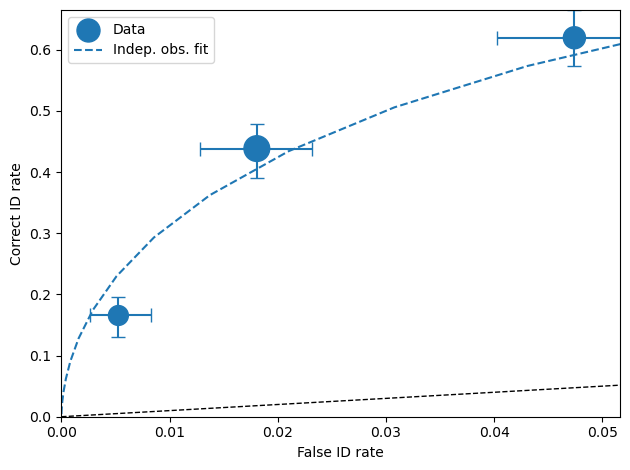

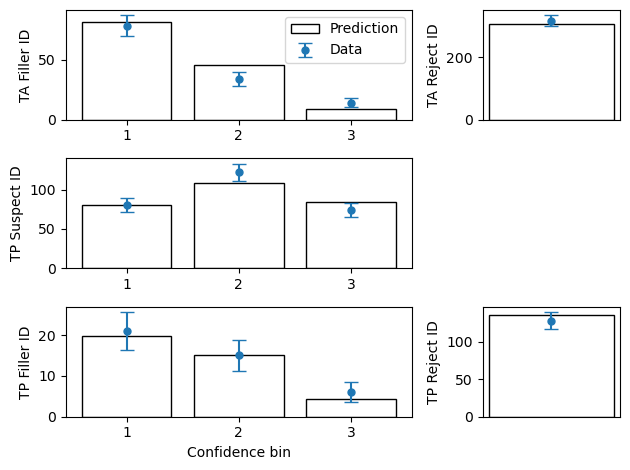

In [21]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels= None)
dp = dr.process()
dp.calculateConfidenceBootstrap(nBootstraps=200)
mf = pyWitness.ModelFitIndependentObservation(dp)
mf.setEqualVariance()
mf.fit()
dp.plotROC(label="Data")
mf.plotROC(label="Indep. obs. fit")
legend()
mf.plotFit()

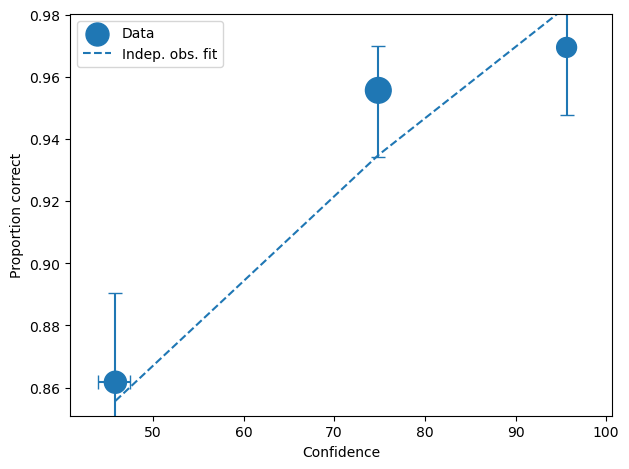

In [22]:
dp.plotCAC(label="Data")
mf.plotCAC(label="Indep. obs. fit")

import matplotlib.pyplot as _plt
_plt.legend()

In [ ]:
mf.plotModel()

In [ ]:
mf.d

## Writing results to file

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dp = dr.process()
dp.writePivotExcel("test1_pivot.xlsx")
dp.writePivotCsv("test1_pivot.csv")
dp.writeRatesExcel("test1_rates.xlsx")
dp.writeRatesCsv("test1_rates.csv")

# Advanced tutorial

## Bootstrapping uncertainties/confidence limits

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels=None)
dp = dr.process()
dp.calculateConfidenceBootstrap(nBootstraps=200, cl=95)
dp.printPivot()
dp.printRates()

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels=None)
dp = dr.process()
dp.calculateConfidenceBootstrap(nBootstraps=200, cl=95)
dp.plotROC() 

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels=None)
dp = dr.process()
dp.calculateConfidenceBootstrap(nBootstraps=200, cl=95)
dp.plotCAC() 

## Loading raw data excel format

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test2.xlsx",excelSheet = "raw data")

## Transforming data into common format

In [6]:
import pyWitness
dr = pyWitness.DataRaw("test2.csv",
                       dataMapping = {"lineupSize":"lineup_size",
                                      "targetLineup":"culprit_present",
                       "targetPresent":"present",
                       "targetAbsent":"absent",
                       "responseType":"id_type",
                       "suspectId":"suspect",
                       "fillerId":"filler",
                       "rejectId":"reject",
                       "confidence":"conf_level"})

pyWitness v1.0 : Authorship - https://lmickes.github.io/pyWitness/authorship.html
pyWitness      : Runtime warnings are suppressed
pyWitness      : to reinstate (import warnings; warnings.simplefilter("") 
DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'age' 'gender' 'group' 'previouslyViewedVideo']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan

## Processing data for two conditions

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test2.csv")
dr.cutData(column="previouslyViewedVideo",value=1,option="keep")
dpControl = dr.process(column="group", condition="Control")

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test2.csv")
dr.cutData(column="previouslyViewedVideo",value=1,option="keep")
dpControl = dr.process(column="group", condition="Control")
dpVerbal = dr.process(column="group", condition="Verbal")

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test2.csv")
dr.cutData(column="previouslyViewedVideo",value=1,option="keep")
dpControl = dr.process(column="group", condition="Control")
dpVerbal = dr.process(column="group", condition="Verbal")
minRate = min(dpControl.liberalTargetAbsentSuspectId,dpVerbal.liberalTargetAbsentSuspectId)

## Statistical (pAUC) comparision between two conditions

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test2.csv")
dr.cutData(column="previouslyViewedVideo",value=1,option="keep")
dpControl = dr.process(column="group", condition="Control")
dpVerbal = dr.process(column="group", condition="Verbal")
minRate = min(dpControl.liberalTargetAbsentSuspectId,dpVerbal.liberalTargetAbsentSuspectId)
dpControl = dr.process("group","Control",pAUCLiberal=minRate)
dpControl.calculateConfidenceBootstrap(nBootstraps=200)
dpVerbal = dr.process("group","Verbal",pAUCLiberal=minRate)
dpVerbal.calculateConfidenceBootstrap(nBootstraps=200)
dpControl.comparePAUC(dpVerbal)

In [ ]:
dpControl.plotROC(label = "Control data", relativeFrequencyScale=400)
dpVerbal.plotROC(label = "Verbal data", relativeFrequencyScale=400)

In [ ]:
import pyWitness
dp = pyWitness.DataProcessed("test1_processed.csv", lineupSize = 6)

## Using instances of raw data, processed data and model fits

In [ ]:
import pyWitness
dr1 = pyWitness.DataRaw("test1.csv")
dr2 = pyWitness.DataRaw("test1.csv")

dr2.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels=None)

dp1 = dr1.process()
dp2 = dr2.process()

dp1.plotCAC()
dp2.plotCAC()

## Overlaying plots

In [ ]:
import pyWitness
dp = pyWitness.DataProcessed("test1_processed.csv", lineupSize = 6)
dp.printPivot() 

DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890
DataRaw.checkData>
DataRaw.checkData> columns       : ['Unnamed: 0' 'participantId' 'lineupSize' 'targetLineup' 'responseType'
 'confidence' 'responseTime']
DataRaw.checkData> lineupSize    : [6]
DataRaw.checkData> targetLineup  : ['targetAbsent' 'targetPresent']
DataRaw.checkData> responseType  : ['fillerId' 'rejectId' 'suspectId']
DataRaw.checkData> confidence    : [  0  10  20  30  40  50  60  70  80  90 100]
DataRaw.checkData> number trials : 890


(0.5, 1.0)

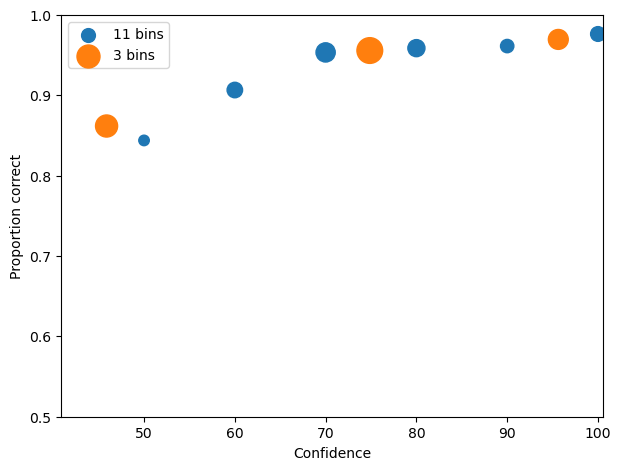

In [10]:
import pyWitness
dr1 = pyWitness.DataRaw("test1.csv")
dr2 = pyWitness.DataRaw("test1.csv")

dr2.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels=None)

dp1 = dr1.process()
dp2 = dr2.process()

dp1.plotCAC(label = "11 bins")
dp2.plotCAC(label = "3 bins")

import matplotlib.pyplot as _plt
_plt.legend()
ylim(0.50,1.00)

## Generating data from signal detection model

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels=None)
dp = dr.process()
mf = pyWitness.ModelFitIndependentObservation(dp, debug=True)
mf.setEqualVariance()
mf.fit()
dr1 = mf.generateRawData(nGenParticipants=10000)

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels=None)
dp = dr.process()
mf = pyWitness.ModelFitIndependentObservation(dp, debug=True)
mf.setEqualVariance()
mf.fit()
dr1 = mf.generateRawData(nGenParticipants=10000)
dr1.writeCsv("fileName.csv")
dr1.writeExcel("fileName.xlsx")

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels=None)
dp = dr.process()
mf = pyWitness.ModelFitIndependentObservation(dp, debug=True)
mf.setEqualVariance()
mf.fit()
dr1 = mf.generateRawData(nGenParticipants=10000)

# Need to process the synthetic data
dp1 = dr1.process()

# calculate uncertainties using bootstrap
dp.calculateConfidenceBootstrap()
dp1.calculateConfidenceBootstrap()

# plot ROCs
dp.plotROC(label="Experimental data")
dp1.plotROC(label="Simulated data")
mf.plotROC(label="Model fit")

import matplotlib.pyplot as _plt
legend()

## Power analysis

In [ ]:
import pyWitness
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column = "confidence",bins = [-1,60,80,100],labels=None)
dp = dr.process()
mf = pyWitness.ModelFitIndependentObservation(dp, debug=False)
mf.setEqualVariance()
mf.fit()

for nGen in numpy.linspace(500, 5000, 9+1) :
    drSimulated = mf.generateRawData(nGenParticipants = nGen)
    dpSimulated = drSimulated.process()
    dpSimulated.calculateConfidenceBootstrap(nBootstraps=2000)
    print(nGen, dpSimulated.liberalTargetAbsentSuspectId,dpSimulated.pAUC, dpSimulated.pAUC_low, dpSimulated.pAUC_high)

In [ ]:
#boogert - where'd this come from?
dr = pyWitness.DataRaw("test1.csv")
dr.collapseContinuousData(column="confidence", bins=[-1, 60, 80, 100], labels=[1, 2, 3])
dp = dr.process()
dp.data_rates.columns.get_level_values(dp.dependentVariable)
dp.data_pivot.loc['targetAbsent' ,'fillerId']
list(dp.data_pivot.loc['targetAbsent', 'fillerId'].axes[0].droplevel())